In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../Data/삼성바이오로직스 주식 데이터.csv',encoding='cp949', parse_dates = ["날짜"])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190339 entries, 0 to 190338
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   종목코드      190339 non-null  object        
 1   종목명       190339 non-null  object        
 2   날짜        190339 non-null  datetime64[ns]
 3   시간        190339 non-null  int64         
 4   시가        190339 non-null  float64       
 5   고가        190339 non-null  float64       
 6   저가        190339 non-null  float64       
 7   종가        190339 non-null  float64       
 8   거래량       190339 non-null  float64       
 9   거래대금      190339 non-null  float64       
 10  누적체결매도수량  190339 non-null  float64       
 11  누적체결매수수량  190339 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 17.4+ MB


In [48]:
# # 날짜 - 날짜형으로 변경
# data['날짜'] = pd.to_datetime(data['날짜'])
# data['날짜']

0     1970-01-01 00:00:00.020220623
1     1970-01-01 00:00:00.020220624
2     1970-01-01 00:00:00.020220627
3     1970-01-01 00:00:00.020220628
4     1970-01-01 00:00:00.020220629
                   ...             
244   1970-01-01 00:00:00.020230619
245   1970-01-01 00:00:00.020230620
246   1970-01-01 00:00:00.020230621
247   1970-01-01 00:00:00.020230622
248   1970-01-01 00:00:00.020230623
Name: 날짜, Length: 249, dtype: datetime64[ns]

In [5]:
data.drop('종목코드', axis=1, inplace=True) 
data.drop('종목명', axis=1, inplace=True) 

In [7]:
data.head()

,날짜,시간,시가,고가,저가,종가,거래량,거래대금,누적체결매도수량,누적체결매수수량
0,2021-06-16,901,829181.0,829181.0,828192.0,828192.0,324.0,820.0,0.0,0.0
1,2021-06-16,902,828192.0,828192.0,825228.0,826216.0,820.0,940.0,0.0,0.0
2,2021-06-16,903,825228.0,827204.0,825228.0,826216.0,1528.0,1233.0,0.0,0.0
3,2021-06-16,904,826216.0,826216.0,824239.0,824239.0,2019.0,1354.0,0.0,0.0
4,2021-06-16,905,824239.0,824239.0,822263.0,823251.0,2687.0,1584.0,0.0,0.0


In [8]:
data['날짜'].min(), data['날짜'].max()

(Timestamp('2021-06-16 00:00:00'), Timestamp('2023-06-23 00:00:00'))

In [9]:
data['Year'] = data['날짜'].dt.year
data['Month'] = data['날짜'].dt.month
data['Day'] = data['날짜'].dt.day
data.drop('날짜', axis = 1, inplace=True)

In [10]:
data.columns

Index(['시간', '시가', '고가', '저가', '종가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량',
       'Year', 'Month', 'Day'],
      dtype='object')

In [11]:
data.dtypes

시간            int64
시가          float64
고가          float64
저가          float64
종가          float64
거래량         float64
거래대금        float64
누적체결매도수량    float64
누적체결매수수량    float64
Year          int64
Month         int64
Day           int64
dtype: object

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['시간', '시가', '고가', '저가', '종가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량',
       'Year', 'Month', 'Day']
# 스케일 후 columns
scaled = scaler.fit_transform(data[scale_cols])
scaled

array([[0.        , 0.41176593, 0.39003113, ..., 0.        , 0.45454545,
        0.5       ],
       [0.00137174, 0.40882266, 0.38709649, ..., 0.        , 0.45454545,
        0.5       ],
       [0.00274348, 0.40000179, 0.38416481, ..., 0.        , 0.45454545,
        0.5       ],
       ...,
       [0.84773663, 0.16719491, 0.14617711, ..., 1.        , 0.45454545,
        0.73333333],
       [0.84910837, 0.16719491, 0.14617711, ..., 1.        , 0.45454545,
        0.73333333],
       [0.86282579, 0.16719491, 0.14617711, ..., 1.        , 0.45454545,
        0.73333333]])

In [13]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190339 entries, 0 to 190338
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시간        190339 non-null  float64
 1   시가        190339 non-null  float64
 2   고가        190339 non-null  float64
 3   저가        190339 non-null  float64
 4   종가        190339 non-null  float64
 5   거래량       190339 non-null  float64
 6   거래대금      190339 non-null  float64
 7   누적체결매도수량  190339 non-null  float64
 8   누적체결매수수량  190339 non-null  float64
 9   Year      190339 non-null  float64
 10  Month     190339 non-null  float64
 11  Day       190339 non-null  float64
dtypes: float64(12)
memory usage: 17.4 MB


train/test 분리

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('종가', 1), df['종가'], test_size=0.2, random_state=0, shuffle=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_9160\3628187252.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(df.drop('종가', 1), df['종가'], test_size=0.2, random_state=0, shuffle=False)


시퀀스 데이터셋 구성

In [16]:
import tensorflow as tf

In [17]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [18]:
# 하이퍼 파라미터
WINDOW_SIZE=20
BATCH_SIZE=32

In [19]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [20]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [22]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [24]:
import os

In [25]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [26]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
   4757/Unknown - 27s 4ms/step - loss: 3.1316e-04 - mse: 6.2631e-04
Epoch 1: val_loss improved from inf to 0.00001, saving model to tmp\ckeckpointer.ckpt
4758/4758 [==============================] - 30s 4ms/step - loss: 3.1311e-04 - mse: 6.2622e-04 - val_loss: 6.9947e-06 - val_mse: 1.3989e-05
Epoch 2/50
4755/4758 [============================>.] - ETA: 0s - loss: 1.1960e-05 - mse: 2.3921e-05
Epoch 2: val_loss improved from 0.00001 to 0.00000, saving model to tmp\ckeckpointer.ckpt
4758/4758 [==============================] - 18s 4ms/step - loss: 1.1956e-05 - mse: 2.3912e-05 - val_loss: 4.4210e-06 - val_mse: 8.8420e-06
Epoch 3/50
4751/4758 [============================>.] - ETA: 0s - loss: 1.0233e-05 - mse: 2.0465e-05
Epoch 3: val_loss did not improve from 0.00000
4758/4758 [==============================] - 18s 4ms/step - loss: 1.0230e-05 - mse: 2.0460e-05 - val_loss: 4.5907e-06 - val_mse: 9.1815e-06
Epoch 4/50
4758/4758 [==============================] - ETA: 0s - loss: 8.83

In [27]:
model.load_weights(filename)

In [28]:
pred = model.predict(test_data)

1189/1189 [==============================] - 2s 2ms/step


In [29]:
pred.shape

(38048, 1)

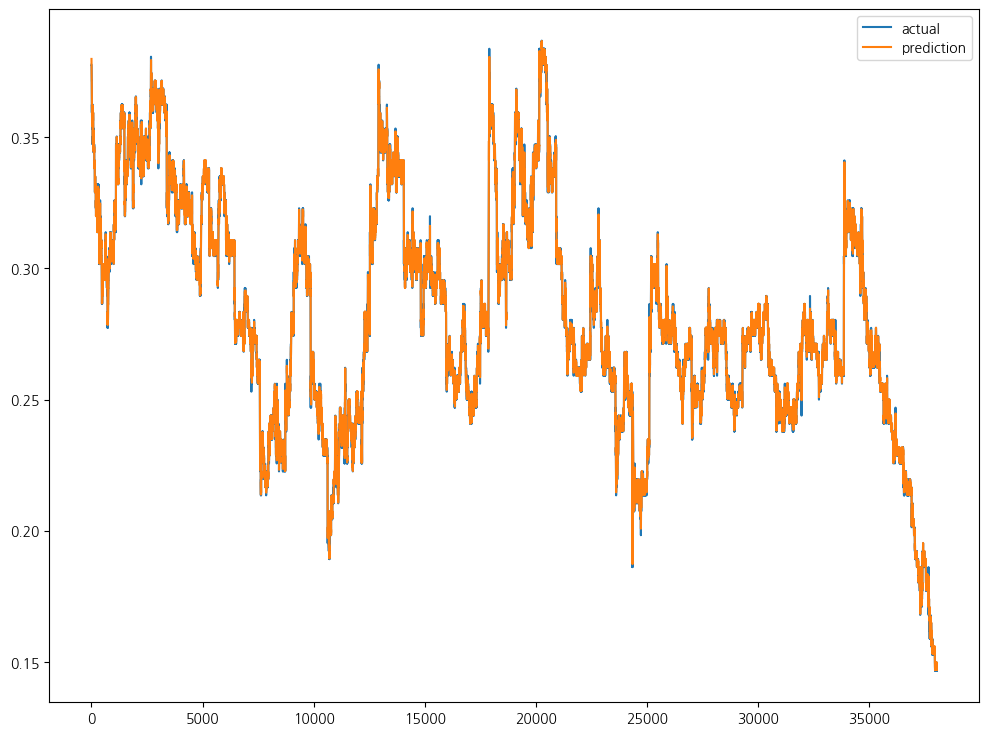

In [30]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()